# Loading the Data

---


In [1]:
# Import preprocessing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the file

!wget 'https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip'

--2023-12-03 17:41:32--  https://maven-datasets.s3.amazonaws.com/Airbnb/Airbnb+Data.zip
Resolving maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)... 52.217.227.25, 3.5.21.20, 16.182.39.193, ...
Connecting to maven-datasets.s3.amazonaws.com (maven-datasets.s3.amazonaws.com)|52.217.227.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91005234 (87M) [application/zip]
Saving to: ‘Airbnb+Data.zip’

Airbnb+Data.zip     100%[===================>]  86.79M  59.9MB/s    in 1.4s    

2023-12-03 17:41:34 (59.9 MB/s) - ‘Airbnb+Data.zip’ saved [91005234/91005234]



In [3]:
# Unzip the file

!unzip Airbnb+Data.zip

Archive:  Airbnb+Data.zip
   creating: Airbnb Data/
  inflating: Airbnb Data/Listings.csv  
  inflating: Airbnb Data/Listings_data_dictionary.csv  
  inflating: Airbnb Data/Reviews.csv  
  inflating: Airbnb Data/Reviews_data_dictionary.csv  


In [4]:
# Load the data frames

listings =  pd.read_csv('/content/Airbnb Data/Listings.csv', encoding = 'latin1', low_memory = False)

#reviews = pd.read_csv('/content/Airbnb Data/Reviews.csv', encoding = 'latin1', low_memory = False)

# Random Sample of Data

---

In [5]:
# Taking a random sample of the data for easier analysis

listings_sample = listings.sample(100000, random_state = 42)

In [6]:
listings_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 179118 to 255375
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   100000 non-null  int64  
 1   name                         99929 non-null   object 
 2   host_id                      100000 non-null  int64  
 3   host_since                   99933 non-null   object 
 4   host_location                99704 non-null   object 
 5   host_response_time           54163 non-null   object 
 6   host_response_rate           54163 non-null   float64
 7   host_acceptance_rate         59780 non-null   float64
 8   host_is_superhost            99933 non-null   object 
 9   host_total_listings_count    99933 non-null   float64
 10  host_has_profile_pic         99933 non-null   object 
 11  host_identity_verified       99933 non-null   object 
 12  neighbourhood                100000 non-null  object 

# Column Transformations

---

In [7]:
# Converting to datetime

listings_sample.host_since = pd.to_datetime(listings.host_since)

In [8]:
# Converting to out-of-10 scale

listings_sample.review_scores_rating = listings.review_scores_rating / 10

In [10]:
listings['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [ ]:
# Converting prices to USD

cities = listings_sample['city'].unique() #jenn note: this is wronnggg
exchange_rates = [1.0808, 1, 0.028388, 0.20328, 0.65462, 0.039480, 1.0808, 0.12777, 0.0493, 0.053215] # update these numbers before fitting models
currency_map = dict(zip(cities, exchange_rates))

listings_sample['usd_price'] = listings_sample.apply(lambda row: row['price'] * currency_map[row['city']], axis=1) # create new column
listings_sample.drop('price', axis = 1, inplace = True) # drop original column

In [ ]:
# Converting to numerical category

# Potentially problematic -> Converting NULL values to zero

listings_sample.host_is_superhost = listings_sample.host_is_superhost.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_has_profile_pic = listings_sample.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0)
listings_sample.host_identity_verified = listings_sample.host_identity_verified.apply(lambda x: 1 if x == 't' else 0)
listings_sample.instant_bookable = listings_sample.instant_bookable.apply(lambda x: 1 if x == 't' else 0)

# Dropping Columns

---

In [ ]:
# Dropping hopeless columns

columns_to_drop = ['listing_id', 'name', 'host_id', 'host_location', 'neighbourhood', 'district',  'amenities']

listings_sample = listings_sample.drop(columns=columns_to_drop, axis=1)

# Data Cleaning

---

In [ ]:
# Get top 5 property_type

listings_sample.property_type.value_counts()[0:5]

Entire apartment             49690
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Categorize the rest into 'Other' category

listings_sample['property_type'] = listings_sample['property_type'].apply(
    lambda x: 'Other' if x not in ('Entire apartment', 'Private room in apartment', 'Private room in house', 'Entire house', 'Entire condominium') else x)

listings_sample.property_type.value_counts()

Entire apartment             49690
Other                        19827
Private room in apartment    16893
Private room in house         4782
Entire house                  4712
Entire condominium            4096
Name: property_type, dtype: int64

In [ ]:
# Checking missing values for host_response_time

listings_sample.host_response_time.value_counts(dropna = False)

NaN                   45837
within an hour        29833
within a few hours    10480
within a day           8408
a few days or more     5442
Name: host_response_time, dtype: int64

In [ ]:
# Replacing missing values with unknown

listings_sample['host_response_time'].fillna('unknown', inplace = True)

# EDA (to be continued)

---

In [ ]:
# Checking skew of numerical columns

listings_sample.skew(axis = 0, numeric_only=True)

host_response_rate              -2.270031
host_acceptance_rate            -1.871278
host_is_superhost                1.662356
host_total_listings_count       23.845350
host_has_profile_pic           -15.716597
host_identity_verified          -0.977378
latitude                        -0.711813
longitude                        0.487746
accommodates                     2.207221
bedrooms                        12.370222
minimum_nights                  16.577005
maximum_nights                 316.176633
review_scores_rating            -3.746942
review_scores_accuracy          -4.163205
review_scores_cleanliness       -2.999510
review_scores_checkin           -5.228129
review_scores_communication     -5.216378
review_scores_location          -4.274060
review_scores_value             -3.240565
instant_bookable                 0.354066
usd_price                       50.204649
dtype: float64

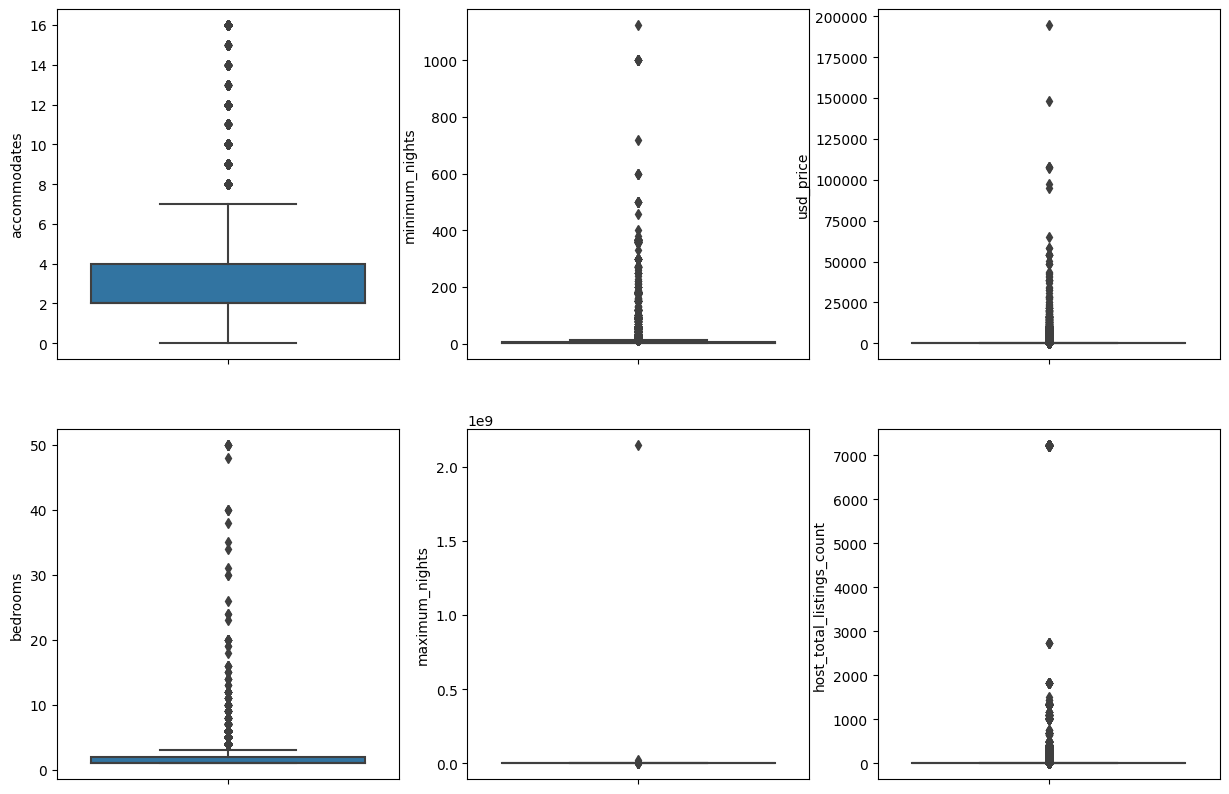

In [ ]:
# Checking for outliers

fig, axs = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(listings_sample, y = 'accommodates', ax=axs[0, 0])
sns.boxplot(listings_sample, y = 'bedrooms', ax=axs[1, 0])
sns.boxplot(listings_sample, y = 'minimum_nights', ax=axs[0, 1])
sns.boxplot(listings_sample, y = 'maximum_nights', ax=axs[1, 1]) # highest value is in billions
sns.boxplot(listings_sample, y = 'usd_price', ax=axs[0, 2])
sns.boxplot(listings_sample, y = 'host_total_listings_count', ax=axs[1, 2])


plt.show();